In [1]:
import tensorflow as tf
import os,shutil
import numpy as np
from matplotlib import pyplot as plt
from tensorflow.keras.layers import Conv2D, BatchNormalization, Activation, MaxPool2D, Dropout,Flatten, Dense 
np.set_printoptions(threshold=np.inf)
from tensorflow.keras import Model

In [2]:
original_dataset_dir='D:/机器学习+毕设+java资料/吴恩达/cat vs dog/dc/train'
base_dir='D:/机器学习+毕设+java资料/吴恩达/cat vs dog/dc/find_cats_and_dogs'
train_dir=os.path.join(base_dir,'train')

validation_dir=os.path.join(base_dir,'validaiton')

test_dir=os.path.join(base_dir,'test')

train_cats_dir = os.path.join(train_dir, 'cats')

train_dogs_dir = os.path.join(train_dir, 'dogs')

validation_cats_dir = os.path.join(validation_dir, 'cats')

validation_dogs_dir = os.path.join(validation_dir, 'dogs')

test_cats_dir = os.path.join(test_dir, 'cats')

test_dogs_dir = os.path.join(test_dir, 'dogs')


In [3]:
print('total training cat images:', len(os.listdir(train_cats_dir)))
print('total training dog images:', len(os.listdir(train_dogs_dir)))
print('total validation cat images:', len(os.listdir(validation_cats_dir)))
print('total validation dog images:', len(os.listdir(validation_dogs_dir)))
print('total test cat images:', len(os.listdir(test_cats_dir)))
print('total test dog images:', len(os.listdir(test_dogs_dir)))

total training cat images: 6000
total training dog images: 6000
total validation cat images: 2000
total validation dog images: 2000
total test cat images: 2000
total test dog images: 2000


In [4]:
from keras.preprocessing.image import ImageDataGenerator
# 训练数据的增强
train_datagen = ImageDataGenerator(
    rescale=1. / 255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

# 不能增强验证数据
test_datagen = ImageDataGenerator(rescale=1.0 / 255)

train_generator = train_datagen.flow_from_directory(
    train_dir,  # 目标目录
    target_size=(150,150),  # 大小调整
    batch_size=16,
    class_mode="binary"
)

validation_generator = test_datagen.flow_from_directory(
    validation_dir,
    target_size=(150,150),
    batch_size=16,
    class_mode="binary"
)


Found 12000 images belonging to 2 classes.
Found 4000 images belonging to 2 classes.


In [5]:
#数据增强处理
datagen = ImageDataGenerator(
    rotation_range=40,  # 0-180的角度值
    width_shift_range=0.2,  # 水平和垂直方向的范围；相对于总宽度或者高度的比例
    height_shift_range=0.2,
    shear_range=0.2,  # 随机错切变换的角度
    zoom_range=0.2,  # 图像随机缩放的角度
    horizontal_flip=True,  # 随机将一半图像进行水平翻转
    fill_mode="nearest"  # 用于填充新创建像素的方法
)

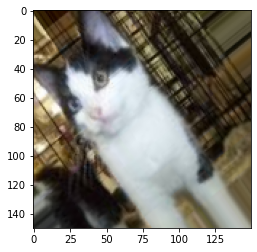

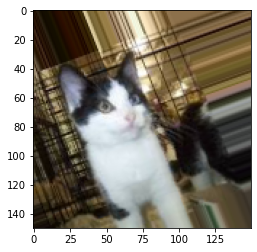

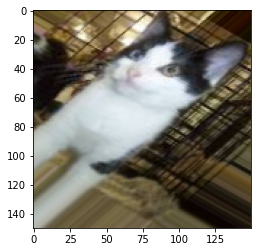

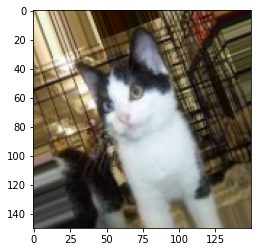

In [6]:
#数据增强
from keras.preprocessing import image

fnames = [os.path.join(train_cats_dir,fname) for fname in os.listdir(train_cats_dir)]
img_path = fnames[3]
# 读取图片并调整大小
img = image.load_img(img_path, target_size=(150,150))  
# 转成数组
x = image.img_to_array(img)

# shape转成(1,150,150,3)
x = x.reshape((1,) + x.shape)

i = 0
for batch in datagen.flow(x, batch_size=1):  # 生成随机变换后的图像批量
    plt.figure()   
    imgplot = plt.imshow(image.array_to_img(batch[0]))
    i += 1
    if i % 4 == 0:
        break  # 循环是无限，需要在某个时刻终止
        
plt.show()

In [7]:
class VGG16(Model):
    def __init__(self):
        super(VGG16,self).__init__()
        self.c1=Conv2D(filters=64,kernel_size=(3,3),padding='same')
        self.b1=BatchNormalization()
        self.a1=Activation('relu')
        
        self.c2=Conv2D(filters=64,kernel_size=(3,3),padding='same')
        self.b2=BatchNormalization()
        self.a2=Activation('relu')
        self.p2=MaxPool2D(pool_size=(2,2),strides=2,padding='same')
        self.d2=Dropout(0.2)
        
        self.c3=Conv2D(filters=128,kernel_size=(3,3),padding='same')
        self.b3=BatchNormalization()
        self.a3=Activation('relu')
        
        self.c4=Conv2D(filters=128,kernel_size=(3,3),padding='same')
        self.b4=BatchNormalization()
        self.a4=Activation('relu')
        self.p4=MaxPool2D(pool_size=(2,2),strides=2,padding='same')
        self.d4=Dropout(0.2)
        
        self.c5=Conv2D(filters=256,kernel_size=(3,3),padding='same')
        self.b5=BatchNormalization()
        self.a5=Activation('relu')
        
        self.c6=Conv2D(filters=256,kernel_size=(3,3),padding='same')
        self.b6=BatchNormalization()
        self.a6=Activation('relu')
        
        self.c7=Conv2D(filters=256,kernel_size=(3,3),padding='same')
        self.b7=BatchNormalization()
        self.a7=Activation('relu')
        self.p7=MaxPool2D(pool_size=(2,2),strides=2,padding='same')
        self.d7=Dropout(0.2)
        
        self.c8=Conv2D(filters=512,kernel_size=(3,3),padding='same')
        self.b8=BatchNormalization()
        self.a8=Activation('relu')
        
        self.c9=Conv2D(filters=512,kernel_size=(3,3),padding='same')
        self.b9=BatchNormalization()
        self.a9=Activation('relu')
        
        self.c10 = Conv2D(filters=512, kernel_size=(3, 3), padding='same')
        self.b10 = BatchNormalization()
        self.a10 = Activation('relu')
        self.p10 = MaxPool2D(pool_size=(2, 2), strides=2, padding='same')
        self.d10 = Dropout(0.2)
        
        self.c11=Conv2D(filters=512,kernel_size=(3,3),padding='same')
        self.b11=BatchNormalization()
        self.a11=Activation('relu')
        
        self.c12=Conv2D(filters=512,kernel_size=(3,3),padding='same')
        self.b12=BatchNormalization()
        self.a12=Activation('relu')
        
        self.c13 = Conv2D(filters=512, kernel_size=(3, 3), padding='same')
        self.b13 = BatchNormalization()
        self.a13 = Activation('relu')
        self.p13 = MaxPool2D(pool_size=(2, 2), strides=2, padding='same')
        self.d13 = Dropout(0.2)
        
        self.flatten=Flatten()
        self.f1=Dense(512,activation='relu')
        self.d14=Dropout(0.2)
        self.f2=Dense(512,activation='relu')
        self.d15=Dropout(0.2)
        self.f3=Dense(1,activation='sigmoid')
    def call(self,x):
        x=self.c1(x)
        x = self.b1(x)
        x = self.a1(x)
        x = self.c2(x)
        x = self.b2(x)
        x = self.a2(x)
        x = self.p2(x)
        x = self.d2(x)

        x = self.c3(x)
        x = self.b3(x)
        x = self.a3(x)
        x = self.c4(x)
        x = self.b4(x)
        x = self.a4(x)
        x = self.p4(x)
        x = self.d4(x)

        x = self.c5(x)
        x = self.b5(x)
        x = self.a5(x)
        x = self.c6(x)
        x = self.b6(x)
        x = self.a6(x)
        x = self.c7(x)
        x = self.b7(x)
        x = self.a7(x)
        x = self.p7(x)
        x = self.d7(x)

        x = self.c8(x)
        x = self.b8(x)
        x = self.a8(x)
        x = self.c9(x)
        x = self.b9(x)
        x = self.a9(x)
        x = self.c10(x)
        x = self.b10(x)
        x = self.a10(x)
        x = self.p10(x)
        x = self.d10(x)

        x = self.c11(x)
        x = self.b11(x)
        x = self.a11(x)
        x = self.c12(x)
        x = self.b12(x)
        x = self.a12(x)
        x = self.c13(x)
        x = self.b13(x)
        x = self.a13(x)
        x = self.p13(x)
        x = self.d13(x)

        x = self.flatten(x)
        x = self.f1(x)
        x = self.d14(x)
        x = self.f2(x)
        x = self.d15(x)
        y = self.f3(x)
        return y

model=VGG16()

In [8]:
model.compile(loss='binary_crossentropy',
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
              metrics=['acc'])

In [9]:
checkpoint_save_path="./checkpoint/vgg16bynet.ckpt"
if os.path.exists(checkpoint_save_path+'.index'):
    print("--------加载模型---------")
    model.load_weights(checkpoint_save_path)
cp_callback=tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_save_path,
                                              save_weights_only=True,
                                              save_best_only=True)

In [10]:
history=model.fit(
      train_generator,
      steps_per_epoch=750,
      epochs=50,
      validation_data=validation_generator,
      validation_steps=250,
    callbacks=[cp_callback])

Epoch 1/50
750/750 [==============================] - 100s 129ms/step - loss: 0.7541 - acc: 0.5514 - val_loss: 0.6695 - val_acc: 0.5807
Epoch 2/50
750/750 [==============================] - 95s 127ms/step - loss: 0.6671 - acc: 0.5910 - val_loss: 0.6865 - val_acc: 0.6327
Epoch 3/50
750/750 [==============================] - 96s 128ms/step - loss: 0.6315 - acc: 0.6315 - val_loss: 0.5794 - val_acc: 0.6895
Epoch 4/50
750/750 [==============================] - 94s 125ms/step - loss: 0.6074 - acc: 0.6647 - val_loss: 0.5705 - val_acc: 0.7253
Epoch 5/50
750/750 [==============================] - 94s 126ms/step - loss: 0.5823 - acc: 0.6982 - val_loss: 0.5693 - val_acc: 0.7065
Epoch 6/50
750/750 [==============================] - 95s 127ms/step - loss: 0.5495 - acc: 0.7262 - val_loss: 0.5521 - val_acc: 0.7120
Epoch 7/50
750/750 [==============================] - 96s 128ms/step - loss: 0.5139 - acc: 0.7502 - val_loss: 0.4623 - val_acc: 0.7840
Epoch 8/50
750/750 [==============================] - 

In [11]:
model.summary()

Model: "vg_g16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              multiple                  1792      
_________________________________________________________________
batch_normalization (BatchNo multiple                  256       
_________________________________________________________________
activation (Activation)      multiple                  0         
_________________________________________________________________
conv2d_1 (Conv2D)            multiple                  36928     
_________________________________________________________________
batch_normalization_1 (Batch multiple                  256       
_________________________________________________________________
activation_1 (Activation)    multiple                  0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) multiple                  0    

Text(0.5, 1.0, 'Training and validation loss')

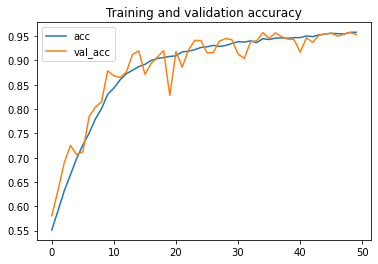

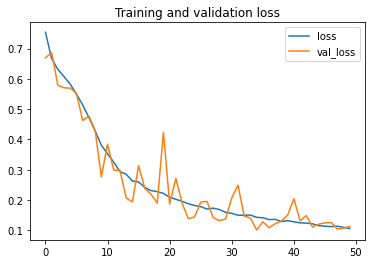

In [12]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs   = range(len(acc))
plt.plot  ( epochs,     acc ,label='acc')
plt.plot  ( epochs, val_acc ,label='val_acc')
plt.legend(loc='best')
plt.title ('Training and validation accuracy')
plt.figure()
plt.plot  ( epochs,     loss ,label='loss')
plt.plot  ( epochs, val_loss ,label='val_loss')
plt.legend(loc='best')
plt.title ('Training and validation loss')


In [14]:
model.save_weights("vggbynet_weight.h5")

去测试准确率

In [15]:
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(150, 150),
    batch_size=16,
    class_mode='binary')

Found 4000 images belonging to 2 classes.


In [17]:
test_loss, test_acc = model.evaluate(test_generator, steps=50)
print('test acc:', test_acc)

50/50 [==============================] - 2s 40ms/step - loss: 0.1213 - acc: 0.9513
test acc: 0.9512500166893005
